In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [125]:
def dir_err(fl,fx):
    d_fl = np.array([
                     np.cos(fl[:,:,2]/180*np.pi)*np.cos(fl[:,:,3]/180*np.pi), 
                     np.sin(fl[:,:,2]/180*np.pi)*np.cos(fl[:,:,3]/180*np.pi), 
                     np.sin(fl[:,:,3]/180*np.pi)
                    ]
                    )
    d_fx = np.array([
                     np.cos(fx[:,:,2]/180*np.pi)*np.cos(fx[:,:,3]/180*np.pi), 
                     np.sin(fx[:,:,2]/180*np.pi)*np.cos(fx[:,:,3]/180*np.pi), 
                     np.sin(fx[:,:,3]/180*np.pi)
                    ]
                    )
    
    e = np.sqrt(np.sum((d_fl-d_fx)**2,axis=0))

    return e

In [3]:
def write_err_wav(err,i_bnd=5):
    L_wav = fl.shape[0]*240
    wf=np.zeros(L_wav)
    for i in range(fl.shape[0]):
        wf[i*240:i*240+240] = errs[i,i_bnd]
    wavfile.write("dir_err.wav",48000,wf)

In [ ]:
fl=np.genfromtxt("DirAC_params_dec_fl").reshape(-1,60,5)
fx=np.genfromtxt("DirAC_params_dec_fx").reshape(-1,60,5)

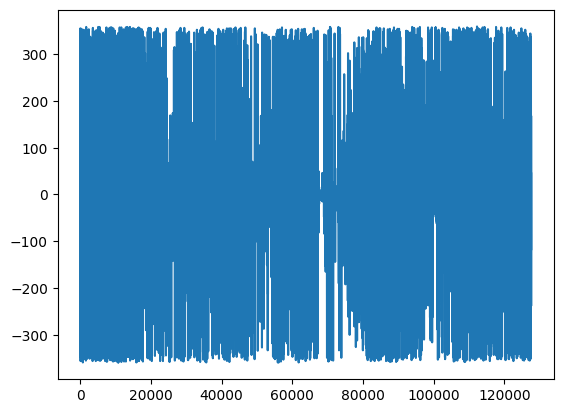

In [153]:
plt.plot( (fl-fx)[:,10,2])

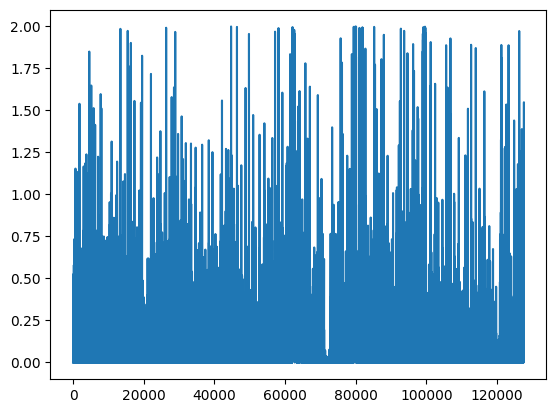

In [ ]:
plt.plot(dir_err(fl,fx)[:,1])